In [18]:
%%html

<h1> Bit Stuck Prevention </h1>
<p> Detect imminent Bit Stuck using exponential moving average. </p>

In [19]:
!jupyter kernelspec list

Available kernels:
  .net-csharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-csharp
  .net-fsharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-fsharp
  python3        C:\App\Dev\Anaconda3\share\jupyter\kernels\python3


BSP.__init__
BSP.Analyze
BSP.NormalizeDataAndSave
Scr column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE
Src file has 20001 lines.
BSP.CalculateEmaAndSave
Norm column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE
Ema column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA
Norm and Ema file has 1176 lines.
BSP.AnalyzeBitStuck
Ema column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA
Ana column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA, BIT_STUCK_DETECT
Bit Stuck detected!!!
BSP.CreateDataSeries


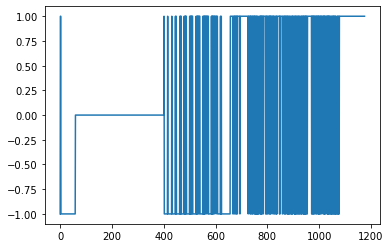

In [24]:
from bsp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bsp1 = BitStuckDetect()

bsp1.Analyze()

#df = pd.read_csv(bsp1.fileAnaPath, sep=',')

#df

bitstuckdetect = pd.Series( bsp1.seriesBITSTUCKDETECT)

bitstuckdetect.plot()

plt.show()



In [21]:
from interaction import *

Interact_Demo()


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='x', options=('abc', 'xyz'), value='abc'), Output()), _dom_classes=…

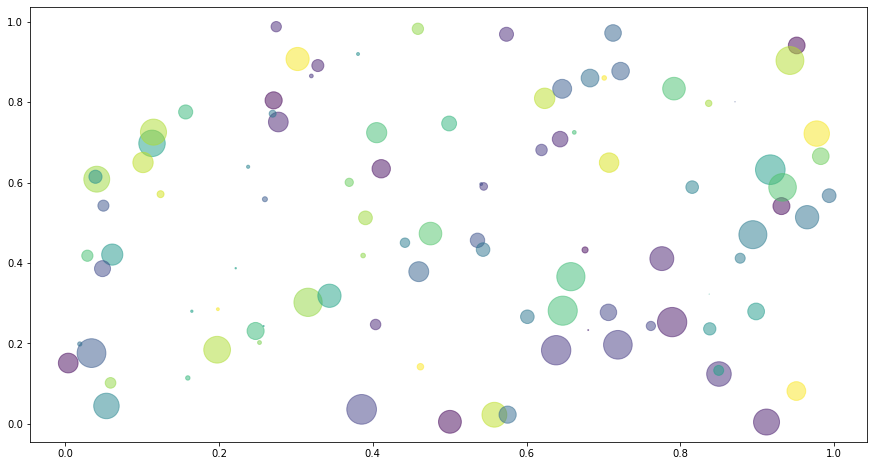

In [22]:
from charts import *

Chart_Demo()